In [1]:
import opsimsummaryv2 as op
from urllib.request import urlretrieve
from pathlib import Path

In [2]:
# Download the db file if needed
file = Path('./example_files/baseline_v3.4_10yrs.db')
if not file.exists():
    print('Downloadinf db file')
    url = "http://astro-lsst-01.astro.washington.edu:8080/fbs_db/fbs_3.4/baseline/baseline_v3.4_10yrs.db"
    output_dir = file.parent
    output_dir.mkdir(parents=True, exist_ok=True)
    
    urlretrieve(url, file)

In [3]:
# Opening the database
OpSimSurv = op.OpSimSurvey('./example_files/baseline_v3.4_10yrs.db')

Reading from database sqlite:///./example_files/baseline_v3.4_10yrs.db
Read N = 2146797 observations in 42.21 seconds.
No host file.


In [4]:
# Compute the healpy representation of the survey with a cut to a minimum of 500 and a maximum of 10000 visits
OpSimSurv.compute_hp_rep(nside=256, minVisits=500, maxVisits=10000)

Finished compute healpy representation, total number of fields : 387834.


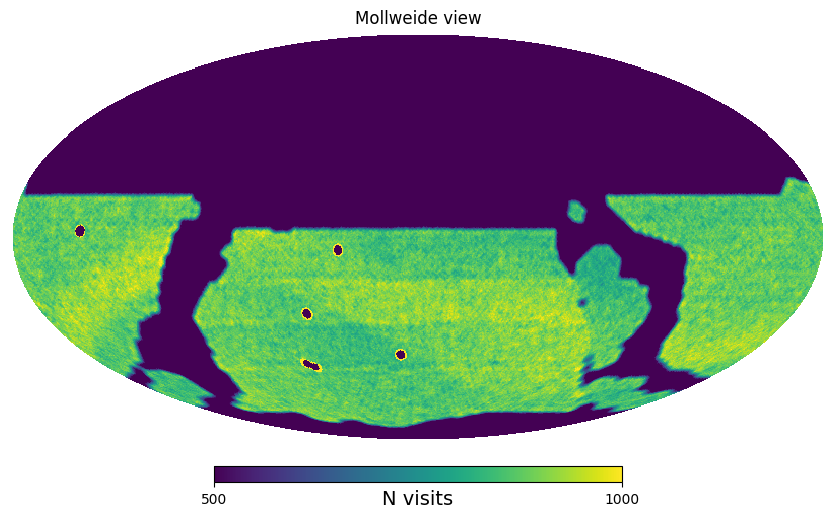

In [5]:
# Plot the healpy configuration
fig = OpSimSurv.plot_hp_rep(min=500, max=1000)

In [6]:
# Sample the survey
N_fields = 100
seed = 1234

# Sample the suvey with 100 fields
OpSimSurv.sample_survey(N_fields, random_seed=seed)

In [7]:
# Survey pointings
OpSimSurv.survey

,ipix,hp_ra,hp_dec,n_visits
0,403097,0.941864,-0.026045,916
1,524999,1.221049,-0.342600,882
2,485222,2.199728,-0.236576,943
3,759386,1.333823,-1.198678,870
4,401279,2.353127,-0.020835,884
...,...,...,...,...
95,441743,5.589826,-0.122704,824
96,768636,1.077834,-1.269855,941
97,675956,2.971145,-0.802522,867
98,520763,0.362019,-0.331563,910


In [8]:
# Getting observations
Obs = OpSimSurv.get_survey_obs()

In [10]:
# Obs is an iterator
First_obs = next(Obs)

In [11]:
First_obs

,ObsID,expMJD,PSF,ZPT,SKYSIG,BAND
0,80797,60920.380557,2.370141,30.230621,44.463951,y
1,82647,60922.352231,3.184828,31.322845,52.395675,z
2,82697,60922.376306,2.677754,30.230406,44.248125,y
3,83611,60923.360757,1.706346,31.819280,46.606189,r
4,83655,60923.381973,1.499023,31.678066,46.770378,i
...,...,...,...,...,...,...
911,2121245,64419.991005,3.878502,30.405649,51.731288,z
912,2124969,64423.978148,2.842412,30.426646,105.084264,z
913,2124982,64423.981231,2.708248,30.410520,77.485358,z
914,2124995,64423.984313,2.673741,30.390771,58.821135,z


In [ ]:
# Writing simlib
sim = op.sim_io.SNANA_Simlib(OpSimSurv, out_path='./example_files/')
